# SHAP

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import shap

from src.config import Config
from src.evaluation import SHAPExplainer
from src.train import ModelTrainer

In [2]:
cfg = Config(Path("../config/config.yaml"))

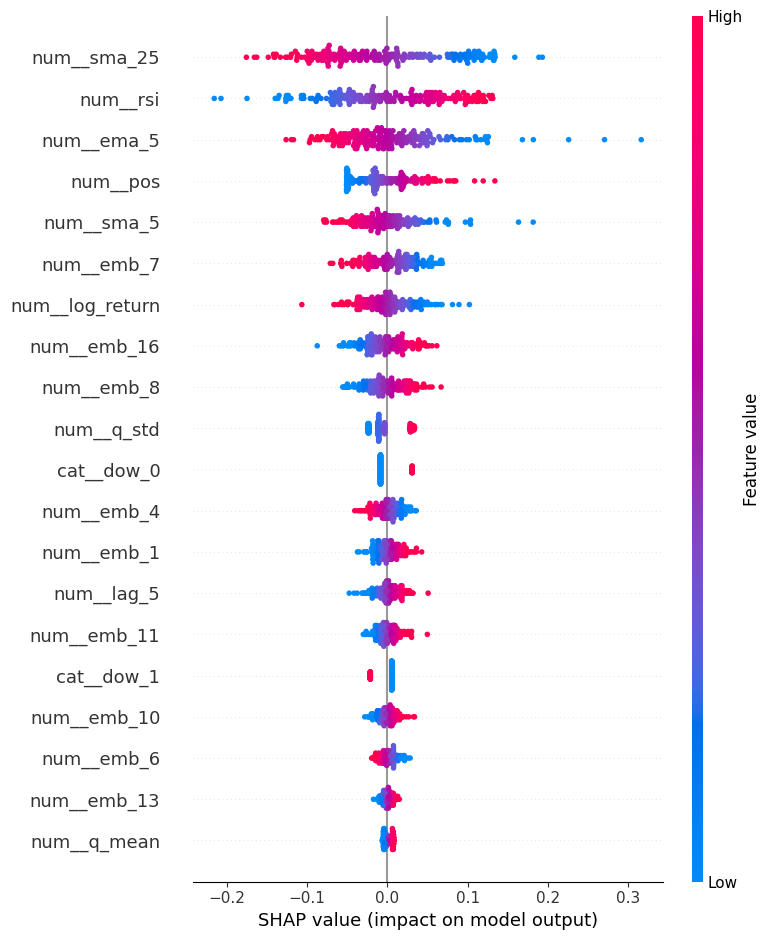

In [3]:
model_path = Path(cfg.model.path_dir) / cfg.model.enet_mo_best_30
model, preprocessor, y_scaler, _ = ModelTrainer.load(str(model_path))

X_test = pd.read_parquet(Path(cfg.data.processed_dir) / "X_test_30.parquet")
X_test_proc = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()

explainer = SHAPExplainer(
    model=model,
    preprocessor=preprocessor,
    background_data=X_test.sample(n=100, random_state=cfg.runtime.seed),
    mode="linear",
)

shap_values = explainer.explain(X_test)

shap.summary_plot(
    shap_values[0],
    X_test_proc,
    feature_names=feature_names,
    show=True
)

In [4]:
X_proc = preprocessor.transform(X_test)
y_pred_scaled = model.predict(X_proc)
print("Y scaled prediction std dev per target:\n", np.std(y_pred_scaled, axis=0))

Y scaled prediction std dev per target:
 target_0     0.139393
target_1     0.091443
target_2     0.104292
target_3     0.075027
target_4     0.092323
target_5     0.100771
target_6     0.087266
target_7     0.130662
target_8     0.155576
target_9     0.100263
target_10    0.130681
target_11    0.117172
target_12    0.137787
target_13    0.110225
target_14    0.088673
target_15    0.095911
target_16    0.106435
target_17    0.119253
target_18    0.085841
target_19    0.103194
target_20    0.107144
target_21    0.098302
target_22    0.098532
target_23    0.114369
target_24    0.093192
target_25    0.084876
target_26    0.088955
target_27    0.083393
target_28    0.116355
target_29    0.097203
dtype: float64


In [5]:
print("Feature std dev after preprocessing:\n", X_proc.std(axis=0))

Feature std dev after preprocessing:
 [1.07355278 0.9824719  0.93533912 0.94835979 0.56693754 0.66248607
 0.8703808  1.02727074 0.88175627 1.03208572 0.90666922 0.96330029
 0.7365295  0.99776259 1.05295954 0.6585203  0.68512481 0.73859238
 0.91970761 0.90187236 1.13765999 0.8241867  1.08421387 1.49906643
 0.20476595 0.27327896 0.82116894 0.89568845 0.88887764 0.81445621
 0.90637367 0.90968918 0.82153045 1.02309454 0.95037045 0.05945895
 0.37048762 0.74565104 0.39287008 0.4045653  0.4045653  0.4045653
 0.39287008 0.46428966 0.38453055 0.3801874  0.47017543]


In [6]:
shap_array = shap_values[0] if isinstance(shap_values, list) else shap_values
print("SHAP mean abs:\n", np.mean(np.abs(shap_array), axis=0))

SHAP mean abs:
 [2.92218517e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.08626795e-02 0.00000000e+00 0.00000000e+00
 1.15772338e-02 0.00000000e+00 7.02138602e-03 2.43903596e-02
 1.96608330e-02 2.53759834e-04 8.30867225e-03 9.48033868e-03
 0.00000000e+00 4.56471938e-03 0.00000000e+00 0.00000000e+00
 2.12293686e-02 2.28996234e-02 6.20743562e-02 0.00000000e+00
 3.86834844e-03 0.00000000e+00 1.07992642e-02 2.87858001e-02
 4.74005733e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.96894963e-02 5.97992505e-05 4.12660277e-03
 1.86221401e-02 0.00000000e+00 1.28864342e-02 8.66176979e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
